In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/major-final-kymograms-cropped/final kymograms cropped/functional/552_crop6.png
/kaggle/input/major-final-kymograms-cropped/final kymograms cropped/functional/267_crop16.png
/kaggle/input/major-final-kymograms-cropped/final kymograms cropped/functional/50_crop12.png
/kaggle/input/major-final-kymograms-cropped/final kymograms cropped/functional/405_crop11.png
/kaggle/input/major-final-kymograms-cropped/final kymograms cropped/functional/598_crop9.png
/kaggle/input/major-final-kymograms-cropped/final kymograms cropped/functional/435_crop2.png
/kaggle/input/major-final-kymograms-cropped/final kymograms cropped/functional/435_crop14.png
/kaggle/input/major-final-kymograms-cropped/final kymograms cropped/functional/373_crop8.png
/kaggle/input/major-final-kymograms-cropped/final kymograms cropped/functional/175_crop13.png
/kaggle/input/major-final-kymograms-cropped/final kymograms cropped/functional/107_crop6.png
/kaggle/input/major-final-kymograms-cropped/final kymograms croppe

In [3]:
from pathlib import Path
import shutil, os
import random
from sklearn.model_selection import train_test_split
from collections import defaultdict

src_dir = Path("/kaggle/input/major-final-kymograms-cropped/final kymograms cropped")
dst_dir = Path("/kaggle/working/binary_split")

# Step 1: Map 3-class labels to binary
label_map = {
    'healthy': 'healthy',
    'functional': 'unhealthy',
    'organic': 'unhealthy'
}

# Step 2: Load and label all images
all_images = []
for cls in os.listdir(src_dir):
    cls_dir = src_dir / cls
    if cls_dir.is_dir():
        mapped_label = label_map[cls]
        for img_path in cls_dir.glob("*.png"):
            all_images.append((img_path, mapped_label))

# Step 3: Split 15% test set
labels = [label for _, label in all_images]
trainval, test = train_test_split(all_images, test_size=0.15, stratify=labels, random_state=42)

# Step 4: Split 85% trainval into 70/15 split (82.35% train and 17.65% val of trainval)
trainval_labels = [label for _, label in trainval]
train, val = train_test_split(trainval, test_size=0.1765, stratify=trainval_labels, random_state=42)

# Step 5: Copy to new directory
def copy_images(data, split_name):
    for img_path, label in data:
        dest_dir = dst_dir / split_name / label
        dest_dir.mkdir(parents=True, exist_ok=True)
        shutil.copy(img_path, dest_dir / img_path.name)

copy_images(train, "train")
copy_images(val, "val")
copy_images(test, "test")

print(f"✅ Data split complete:\n- Train: {len(train)}\n- Validation: {len(val)}\n- Test: {len(test)}")

# Step 6: Oversample to balance training set
train_dir = dst_dir / "train"
class_images = defaultdict(list)

for cls in os.listdir(train_dir):
    cls_path = train_dir / cls
    class_images[cls] = list(cls_path.glob("*.png"))

# Determine max class count
target_count = max(len(images) for images in class_images.values())

# Oversample
for cls, images in class_images.items():
    if len(images) < target_count:
        to_add = random.choices(images, k=target_count - len(images))
        for i, img_path in enumerate(to_add):
            new_name = img_path.stem + f"_dup{i}" + img_path.suffix
            shutil.copy(img_path, img_path.parent / new_name)

print(f"✅ Training set balanced using random oversampling (~{target_count} per class)")

✅ Data split complete:
- Train: 6926
- Validation: 1485
- Test: 1485
✅ Training set balanced using random oversampling (~4353 per class)


2025-05-08 12:47:03.652757: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746708423.832756      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746708423.885066      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 8706 images belonging to 2 classes.
Found 1485 images belonging to 2 classes.
Found 1485 images belonging to 2 classes.


I0000 00:00:1746708435.817327      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746708435.817983      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 1024)                │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,696,961 (29.36 MB)

 Trainable params: 657,921 (2.51 MB)

 Non-trainable params: 7,039,040 (26.85 MB)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1746708461.294157     118 service.cc:148] XLA service 0x7ff3dc021430 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746708461.295075     118 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746708461.295097     118 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746708464.064281     118 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/273 ━━━━━━━━━━━━━━━━━━━━ 2:35:17 34s/step - accuracy: 0.4688 - loss: 0.8896

I0000 00:00:1746708475.701423     118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


273/273 ━━━━━━━━━━━━━━━━━━━━ 89s 203ms/step - accuracy: 0.7240 - loss: 0.5953 - val_accuracy: 0.8195 - val_loss: 0.3821
Epoch 2/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 24s 86ms/step - accuracy: 0.8851 - loss: 0.2718 - val_accuracy: 0.9212 - val_loss: 0.1951
Epoch 3/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 25s 90ms/step - accuracy: 0.9463 - loss: 0.1568 - val_accuracy: 0.9131 - val_loss: 0.2161
Epoch 4/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 25s 89ms/step - accuracy: 0.9472 - loss: 0.1438 - val_accuracy: 0.9266 - val_loss: 0.2023
Epoch 5/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 25s 91ms/step - accuracy: 0.9600 - loss: 0.1046 - val_accuracy: 0.9226 - val_loss: 0.2158
Epoch 6/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 27s 97ms/step - accuracy: 0.9631 - loss: 0.0980 - val_accuracy: 0.9556 - val_loss: 0.1205
Epoch 7/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - accuracy: 0.9721 - loss: 0.0751 - val_accuracy: 0.9549 - val_loss: 0.1171
Epoch 8/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 26s 93ms/step - accuracy: 0.9693 - loss: 0.0820 - val_accura

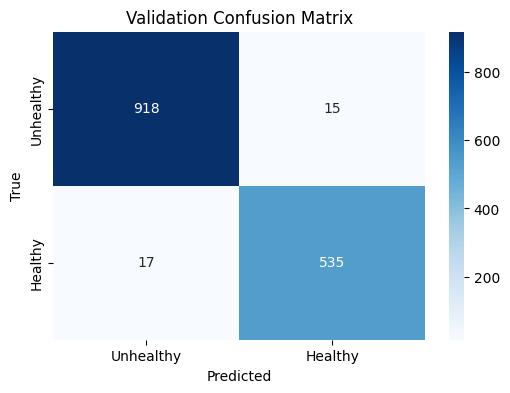

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, ReLU
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to your folders
train_dir = '/kaggle/working/binary_split/train'
val_dir = '/kaggle/working/binary_split/val'
test_dir = '/kaggle/working/binary_split/test'

# Parameters
img_size = (224, 224)
batch_size = 32
input_shape = img_size + (3,)

# Image Generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='binary'
)

val_gen = val_test_datagen.flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size, class_mode='binary', shuffle=False
)

test_gen = val_test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='binary', shuffle=False
)

# Build the DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape, pooling='max')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    Flatten(),
    Dense(512), ReLU(),
    BatchNormalization(),
    Dropout(0.25),
    Dense(256), ReLU(),
    BatchNormalization(),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30
)

# Evaluate on validation set
val_probs = model.predict(val_gen).flatten()
val_preds = (val_probs > 0.5).astype(int)
val_true = val_gen.classes

print("Validation Classification Report:")
print(classification_report(val_true, val_preds, target_names=['Unhealthy', 'Healthy']))
print(f"Validation Accuracy: {accuracy_score(val_true, val_preds) * 100:.2f}%")
print(f"Validation ROC-AUC: {roc_auc_score(val_true, val_probs) * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(val_true, val_preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Unhealthy', 'Healthy'], yticklabels=['Unhealthy', 'Healthy'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Validation Confusion Matrix")
plt.show()


 2/47 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step

Test Performance of Binary Classification
Metrics              DenseNet121
-----------------------------------
healthy
F1 score (%)               98.17
Precision (%)              98.49
Recall (%)                 97.86
-----------------------------------
unhealthy
F1 score (%)               96.94
Precision (%)              96.42
Recall (%)                 97.46
-----------------------------------
AUC (%)                    99.69
Sensitivity (%)            97.46
Specificity (%)            97.86
Overall Accuracy (%)       97.71


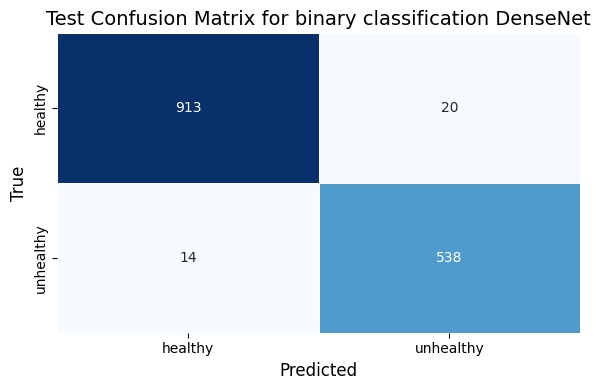

In [5]:
# === Evaluate on Test Set ===
test_probs = model.predict(test_gen).flatten()
test_preds = (test_probs > 0.5).astype(int)
test_true = test_gen.classes
class_names = list(test_gen.class_indices.keys())

# Classification Report
report = classification_report(test_true, test_preds, target_names=class_names, output_dict=True)
conf_matrix = confusion_matrix(test_true, test_preds)

# AUC
auc_score = roc_auc_score(test_true, test_probs) * 100

# Sensitivity & Specificity
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

sensitivity = TP / (TP + FN) * 100 if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) * 100 if (TN + FP) > 0 else 0

# Accuracy
acc = accuracy_score(test_true, test_preds) * 100

# === Print Nicely Formatted Results ===
print("\nTest Performance of Binary Classification")
print(f"{'Metrics':<20}{'DenseNet121':>12}")
print("-" * 35)

for cls in class_names:
    print(cls)
    print(f"{'F1 score (%)':<20}{report[cls]['f1-score'] * 100:>12.2f}")
    print(f"{'Precision (%)':<20}{report[cls]['precision'] * 100:>12.2f}")
    print(f"{'Recall (%)':<20}{report[cls]['recall'] * 100:>12.2f}")
    print("-" * 35)

print(f"{'AUC (%)':<20}{auc_score:>12.2f}")
print(f"{'Sensitivity (%)':<20}{sensitivity:>12.2f}")
print(f"{'Specificity (%)':<20}{specificity:>12.2f}")
print(f"{'Overall Accuracy (%)':<20}{acc:>12.2f}")

# === Confusion Matrix Plot ===
# === Confusion Matrix Plot ===
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names, 
            linewidths=0.5, linecolor='white', cbar=False)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12)
plt.title("Test Confusion Matrix for binary classification DenseNet", fontsize=14)
plt.tight_layout()
plt.show()



47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step

Validation Performance Metrics
Metrics              DenseNet121
-----------------------------------
healthy
F1 Score (%)               98.29
Precision (%)              98.18
Recall (%)                 98.39
-----------------------------------
unhealthy
F1 Score (%)               97.10
Precision (%)              97.27
Recall (%)                 96.92
-----------------------------------
AUC (%)                    99.70
Sensitivity (%)            96.92
Specificity (%)            98.39
Accuracy (%)               97.85


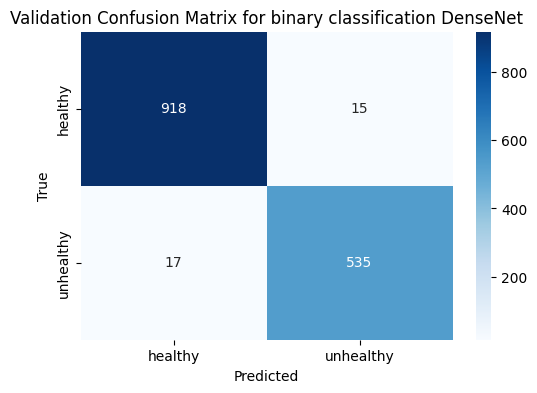

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get validation labels and predictions
val_true = val_gen.classes
val_probs = model.predict(val_gen).flatten()
val_preds = (val_probs > 0.5).astype(int)

# Class names (based on your folder structure)
class_names = list(val_gen.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(val_true, val_preds)

# Calculate metrics
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP / (TP + FN) * 100 if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) * 100 if (TN + FP) > 0 else 0
accuracy = accuracy_score(val_true, val_preds) * 100
auc = roc_auc_score(val_true, val_probs) * 100
report = classification_report(val_true, val_preds, target_names=class_names, output_dict=True)

# Print report
print("\nValidation Performance Metrics")
print(f"{'Metrics':<20}{'DenseNet121':>12}")
print("-" * 35)
for cls in class_names:
    print(cls)
    print(f"{'F1 Score (%)':<20}{report[cls]['f1-score'] * 100:>12.2f}")
    print(f"{'Precision (%)':<20}{report[cls]['precision'] * 100:>12.2f}")
    print(f"{'Recall (%)':<20}{report[cls]['recall'] * 100:>12.2f}")
    print("-" * 35)

print(f"{'AUC (%)':<20}{auc:>12.2f}")
print(f"{'Sensitivity (%)':<20}{sensitivity:>12.2f}")
print(f"{'Specificity (%)':<20}{specificity:>12.2f}")
print(f"{'Accuracy (%)':<20}{accuracy:>12.2f}")

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Validation Confusion Matrix for binary classification DenseNet")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


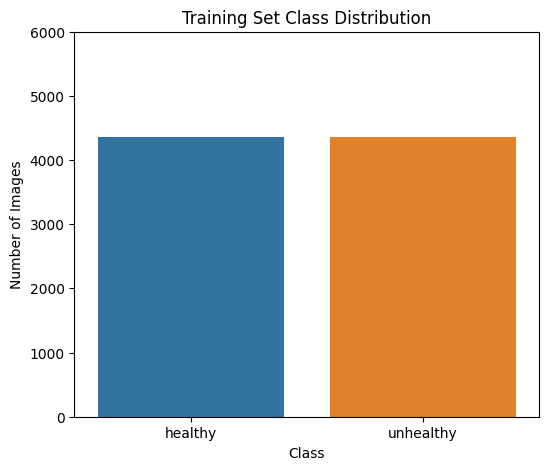

In [7]:
import pandas as pd

# Count samples per class
class_counts = pd.Series(train_gen.classes).value_counts().sort_index()
class_labels = list(train_gen.class_indices.keys())

# Plot it
plt.figure(figsize=(6,5))
sns.barplot(x=class_labels, y=class_counts.values)
plt.title("Training Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.ylim(0, 6000)  # Set y-axis range
plt.show()


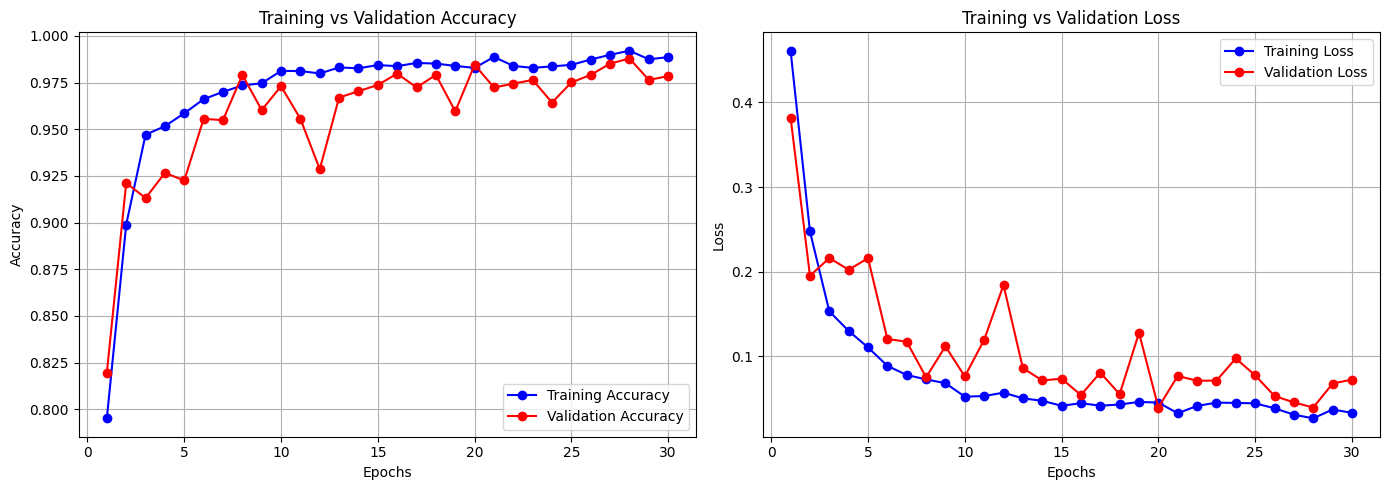

In [8]:
def plot_training_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function after training
plot_training_curves(history)


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step


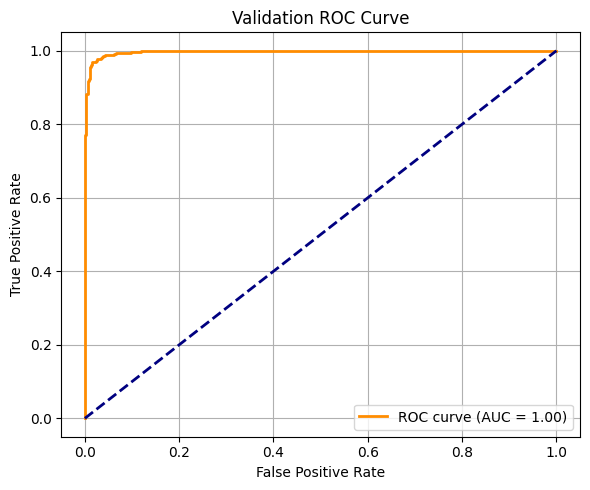

In [9]:
# === EVALUATION: ROC Curve and Saving Values ===
from sklearn.metrics import roc_curve, auc
import pandas as pd

# Predict probabilities
val_probs = model.predict(val_gen).flatten()
val_preds = (val_probs > 0.5).astype(int)
val_true = val_gen.classes

# Save true and predicted probabilities to CSV
df = pd.DataFrame({
    'y_true': val_true,
    'y_prob': val_probs
})
df.to_csv('/kaggle/working/val_predictions.csv', index=False)

# Compute ROC
fpr, tpr, thresholds = roc_curve(val_true, val_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd

# Convert history.history to a DataFrame
history_df = pd.DataFrame(history.history)

# Save only accuracy columns (optional: add loss columns too)
accuracy_df = history_df[['accuracy', 'val_accuracy']]
accuracy_df.to_csv('/kaggle/working/accuracy_per_epoch.csv', index_label='epoch')

# Optional: save full history
# history_df.to_csv('/kaggle/working/full_training_history.csv', index_label='epoch')
